In [58]:
import pandas as pd
from strategy import MyStrategy
import matplotlib.pyplot as plt
import numpy as np
from lib.utils import plot

In [59]:
o_base = pd.read_csv('journal/journal_base_continuous-L.csv')
o_05 = pd.read_csv('journal/journal_05_continuous-L.csv')
o_10 = pd.read_csv('journal/journal_10_continuous-L.csv')
o_15 = pd.read_csv('journal/journal_15_continuous-L.csv')
o_20 = pd.read_csv('journal/journal_20_continuous-L.csv')

In [40]:
base_50=o_base['Position'].describe()['50%']
L05_50 = o_05['Position'].describe()['50%']
L10_50 = o_10['Position'].describe()['50%']
L15_50 = o_15['Position'].describe()['50%']
L20_50 = o_20['Position'].describe()['50%']

In [48]:
l50 = [base_50, L05_50, L10_50, L15_50, L20_50]

In [46]:
df_base = pd.read_csv('journal/bt_base.csv')
df_05 = pd.read_csv('journal/bt_05L.csv')
df_10 = pd.read_csv('journal/bt_10L.csv')
df_15 = pd.read_csv('journal/bt_15L.csv')
df_20 = pd.read_csv('journal/bt_20L.csv')

In [60]:
all_df_base = pd.read_csv('journal/all_bt_base.csv')
all_df_05 = pd.read_csv('journal/all_bt_05L.csv')
all_df_10 = pd.read_csv('journal/all_bt_10L.csv')
all_df_15 = pd.read_csv('journal/all_bt_15L.csv')
all_df_20 = pd.read_csv('journal/all_bt_20L.csv')

In [47]:
class newStr(MyStrategy):
    
    def __init__(self, journal_df):
        super().__init__(journal_df)
        
    def generate_signals(self, p50):
#         pass
        self.strat_df['Position'][self.strat_df['Position'] >= p50] = 1
        self.strat_df['Position'][self.strat_df['Position'] <= p50] = -1
        

In [68]:
def stats_result(strat_list, training_stats):
    if type(strat_list) == list:
        assert len(strat_list) == len(training_stats)
        for d in range(len(strat_list)):
            ns = newStr(strat_list[d])
            ns.generate_signals(training_stats[d])
            ns.run_backtest()
            ns.stats()
            print('CumSum: {}'.format(ns.strat_df['PnL'].sum()))
        return 0
    
    else:
        ns = newStr(strat_list)
        ns.generate_signals(training_stats)
        ns.run_backtest()
        ns.stats()
        print('CumSum: {}'.format(ns.strat_df['PnL'].sum()))
        return ns.strat_df

In [64]:
type(dl) == list

True

In [53]:
dl=[df_base, df_05, df_10, df_15, df_20]
for d in range(len(dl)):
    ns = newStr(dl[d])
    ns.generate_signals(l50[d])
    ns.run_backtest()
    ns.stats()
    print('CumSum: {}'.format(ns.strat_df['PnL'].sum()))

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':



_______________________________________________________________________________________________________


Accuracy:	43.75% 
Total:		241469
Avg Win:	0.03%	Max Win:	5.17%
Avg Loss:	0.02%	Max Loss:	2.45%
Max Drawdown: 0.3474
Sharpe: -0.0514
Sortino: -0.0789
CumSum: -158.35000000000002

_______________________________________________________________________________________________________


Accuracy:	48.46% 
Total:		241469
Avg Win:	0.03%	Max Win:	5.17%
Avg Loss:	0.02%	Max Loss:	3.99%
Max Drawdown: 0.1028
Sharpe: 1.0741
Sortino: 1.6813
CumSum: 3476.1000000000017

_______________________________________________________________________________________________________


Accuracy:	42.25% 
Total:		241469
Avg Win:	0.03%	Max Win:	3.77%
Avg Loss:	0.02%	Max Loss:	5.17%
Max Drawdown: 0.9165
Sharpe: -0.3248
Sortino: -0.4432
CumSum: -1065.1000000000097

_______________________________________________________________________________________________________


Accuracy:	43.2% 
Total:		241469
Avg Win:	0.0

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':



_______________________________________________________________________________________________________


Accuracy:	49.72% 
Total:		241469
Avg Win:	0.03%	Max Win:	5.17%
Avg Loss:	0.02%	Max Loss:	3.77%
Max Drawdown: 0.0426
Sharpe: 1.2911
Sortino: 2.067


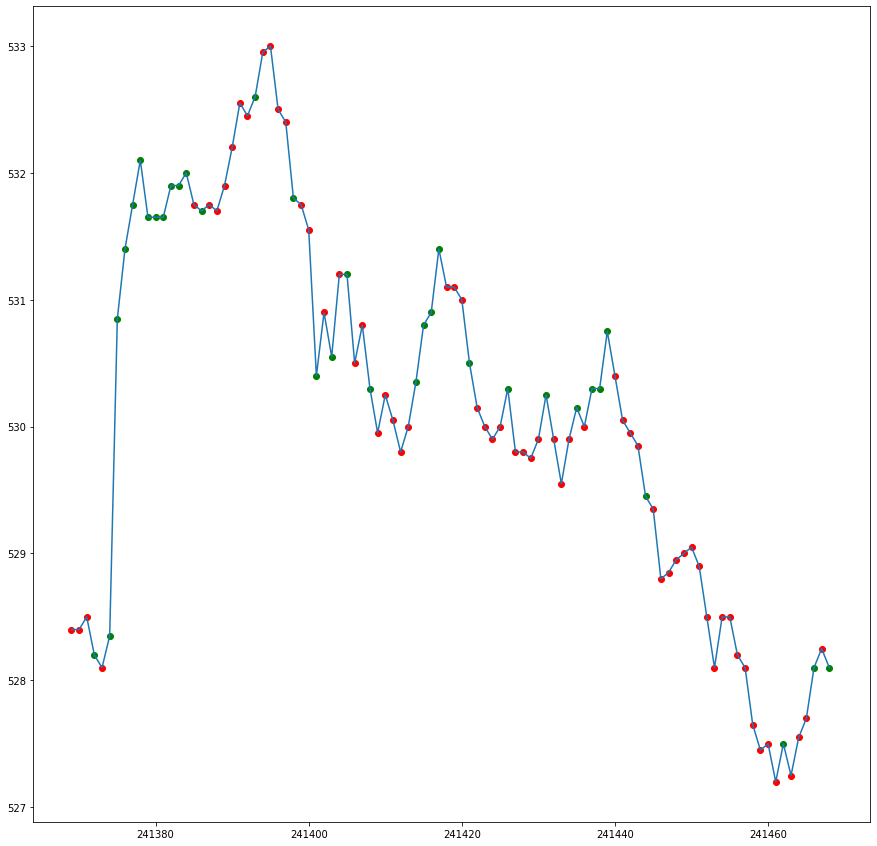

In [55]:
ns = newStr(df_20)
ns.generate_signals(L20_50)
ns.run_backtest()
ns.stats()
plot(ns.strat_df, start_index=ns.strat_df.shape[0]-100)

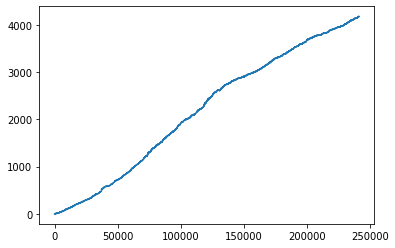

In [56]:
plt.plot(ns.strat_df['CumPnL'])

In [57]:
(ns.strat_df['Position'].diff().abs().sum() * 50)/(ns.strat_df['PnL'].sum()*200)

10.422427402765203

In [61]:
al = [all_df_base, all_df_05, all_df_10, all_df_15, all_df_20]
for d in range(len(al)):
    ns = newStr(al[d])
    ns.generate_signals(l50[d])
    ns.run_backtest()
    ns.stats()
    print('CumSum: {}'.format(ns.strat_df['PnL'].sum()))

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':



_______________________________________________________________________________________________________


Accuracy:	44.32% 
Total:		803334
Avg Win:	0.03%	Max Win:	6.06%
Avg Loss:	0.03%	Max Loss:	6.98%
Max Drawdown: 0.7748
Sharpe: -0.0413
Sortino: -0.06
CumSum: -354.275

_______________________________________________________________________________________________________


Accuracy:	52.54% 
Total:		803334
Avg Win:	0.03%	Max Win:	6.06%
Avg Loss:	0.02%	Max Loss:	6.98%
Max Drawdown: 0.0727
Sharpe: 2.0207
Sortino: 3.1687
CumSum: 20016.424999999977

_______________________________________________________________________________________________________


Accuracy:	44.76% 
Total:		803334
Avg Win:	0.03%	Max Win:	6.06%
Avg Loss:	0.03%	Max Loss:	6.98%
Max Drawdown: 0.8811
Sharpe: -0.0621
Sortino: -0.0861
CumSum: -599.6750000000236

_______________________________________________________________________________________________________


Accuracy:	45.7% 
Total:		803334
Avg Win:	0.03%	Max Win:	6.

In [69]:
all_05 = stats_result(all_df_05, L05_50)

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':



_______________________________________________________________________________________________________


Accuracy:	52.54% 
Total:		803334
Avg Win:	0.03%	Max Win:	6.06%
Avg Loss:	0.02%	Max Loss:	6.98%
Max Drawdown: 0.0727
Sharpe: 2.0207
Sortino: 3.1687
CumSum: 20016.424999999977


In [70]:
all_20 = stats_result(all_df_20, L20_50)

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':



_______________________________________________________________________________________________________


Accuracy:	51.26% 
Total:		803334
Avg Win:	0.03%	Max Win:	6.06%
Avg Loss:	0.02%	Max Loss:	6.98%
Max Drawdown: 0.11
Sharpe: 1.7687
Sortino: 2.7271
CumSum: 17564.175000000017


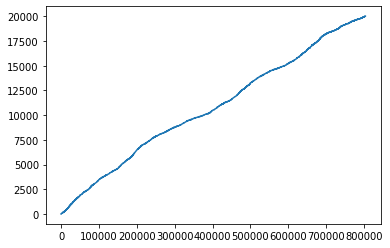

In [71]:
plt.plot(all_05['CumPnL'])

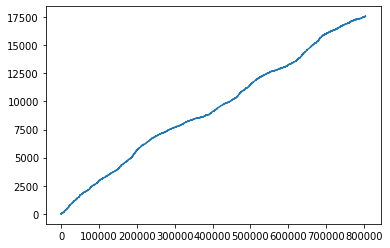

In [72]:
plt.plot(all_20['CumPnL'])

In [75]:
(all_05['Position'].diff().abs().sum() * 50)/(all_05['PnL'].sum()*50)

30.1160671798286

In [76]:
(all_20['Position'].diff().abs().sum() * 50)/(all_20['PnL'].sum()*50)

26.365827031443235

In [100]:
all_20['Account']=np.zeros(all_20.shape[0])

In [101]:
all_20['Account'].iloc[0]=300000

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
all_20['Account'] = all_20.apply(lambda x: x['Account']+x['PnL']*200, axis=1)

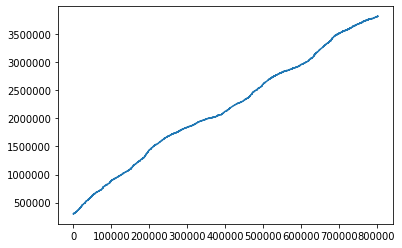

In [104]:
plt.plot(all_20['Account'].cumsum())

In [105]:
all_05['Account']=np.zeros(all_05.shape[0])
all_05['Account'].iloc[0]=300000

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [106]:
all_05['Account'] = all_05.apply(lambda x: x['Account']+x['PnL']*200, axis=1)

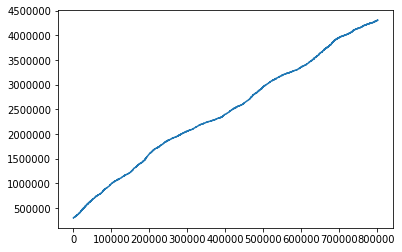

In [107]:
plt.plot(all_05['Account'].cumsum())